In [1]:
from umap import UMAP
import umap.plot

import numpy as np
from sklearn.decomposition import PCA

/home/cat/mambaforge/envs/tangle/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
clip = dict(img_embeds=np.load("../coco_train2017_image_embeds.npy"),
            text_embeds=np.load("../coco_train2017_text_embeds.npy"))

cloob = dict(img_embeds=np.load("../cloob-vit-b-16/cloob_laion_400m_vit_b_16_32_epochs_coco_train2017_image_embeds.npy"),
             text_embeds=np.load("../cloob-vit-b-16/cloob_laion_400m_vit_b_16_32_epochs_coco_train2017_text_embeds.npy"))



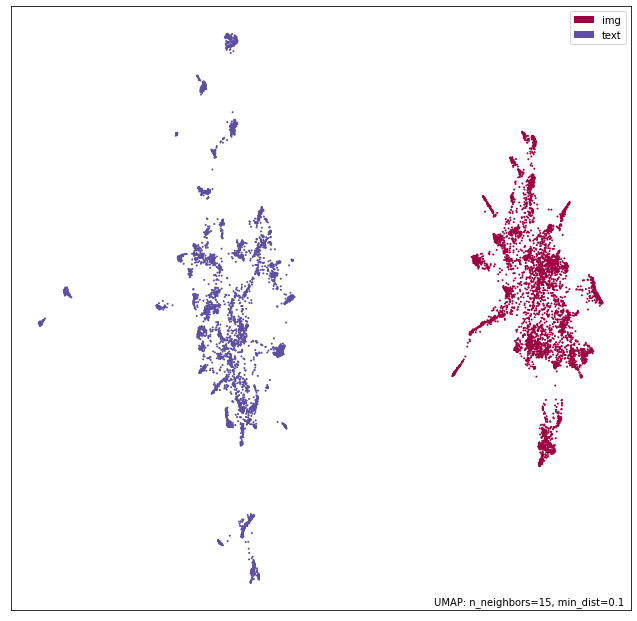

In [7]:
def pca_and_umap(img_embeds, text_embeds, subset_n=5000, pca_to=256):
    
    all_embs = np.concatenate([img_embeds[:subset_n], 
                               text_embeds[:subset_n]], 
                              axis=0)
    
    pca = PCA(n_components=pca_to).fit_transform(all_embs)
    umaped = UMAP(n_components=2).fit(pca)
    
    labels = subset_n * ["img"] + subset_n * ["text"]
    umap.plot.points(umaped, labels=np.array(labels))


pca_and_umap(**clip)

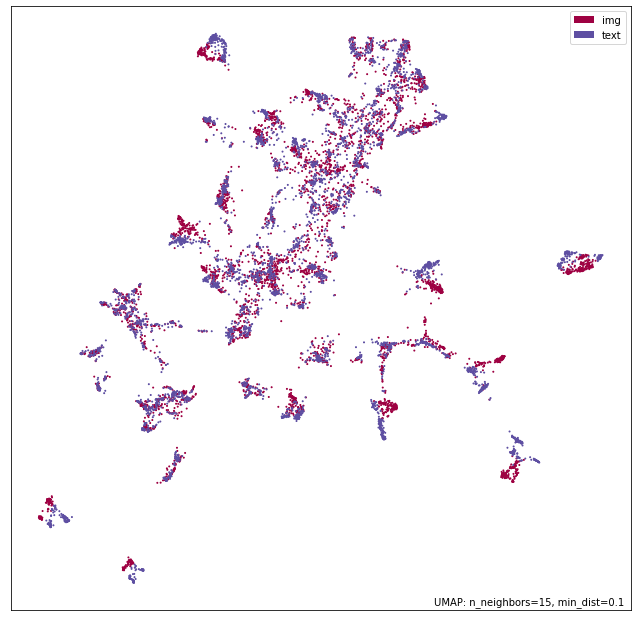

In [8]:
pca_and_umap(**cloob)